In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 01 Hitters Data

In [109]:
hitters = pd.read_csv('data/Hitters.csv')

In [110]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [111]:
hitters['Salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 322 entries, 0 to 321
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
263 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [112]:
hitters['Salary'].count(), hitters['Salary'].notnull().sum()

(263, 263)

In [113]:
hitters = hitters.dropna(subset=['Salary'])

In [114]:
hitters['Salary'].info()

<class 'pandas.core.series.Series'>
Index: 263 entries, 1 to 321
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
263 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [115]:
hits, years, salary = hitters[['Hits', 'Years', 'Salary']].to_numpy().T

In [116]:
hits.shape, years.shape, salary.shape

((263,), (263,), (263,))

## 02 `plt.scatter()`

### 02-1 Using salary as a *size* of points

> The primary difference of `plt.scatter` from `plt.plot` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

In [117]:
salary_10 = salary / 10

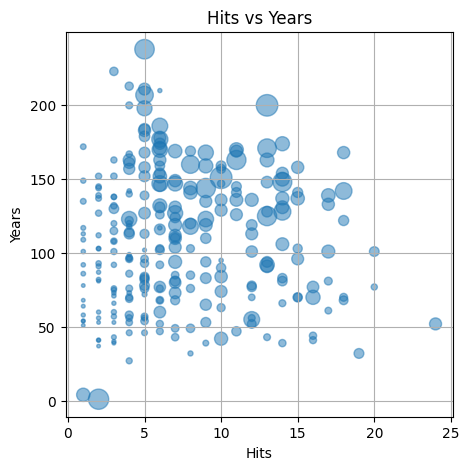

In [118]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(years, hits, s=salary_10, alpha=0.5)
ax.set_xlabel('Hits')
ax.set_ylabel('Years')
ax.set_title('Hits vs Years')
ax.grid(True);

> The simplest legend can be created with the `ax.legend` command, which automatically creates a legend for any labeled plot elements.

> Sometimes the legend defaults are not sufficient for the given visualization. For exam‐ ple, perhaps you’re using the size of points to mark certain features of the data, and want to create a legend reflecting this. 

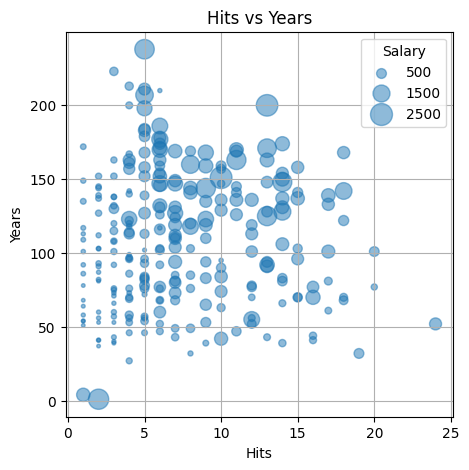

In [126]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(years, hits, s=salary_10, alpha=0.5, label=None)
ax.set_xlabel('Hits')
ax.set_ylabel('Years')
ax.set_title('Hits vs Years')

for slry in [50, 150, 250]:
    ax.scatter([], [], alpha=0.5, color='#1f77b4',
    s=slry, label=str(slry*10))
ax.legend(loc='upper right', frameon=True, title='Salary')

ax.grid(True);

### 02-2 Using salary as a *color* of points

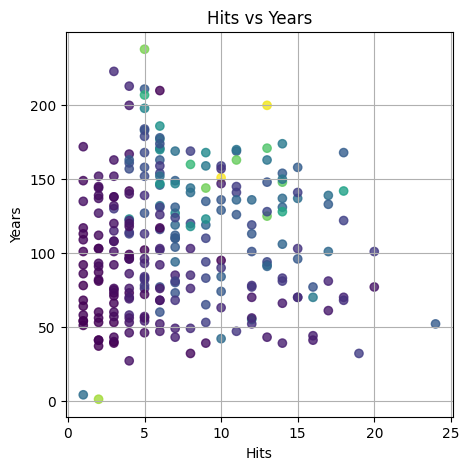

In [120]:
# Let's plot the scatter plot of hits and years using salary as the COLOR of the points.
# We will use the 'viridis' colormap and 'subplots' to create the plot.
fig, ax = plt.subplots(figsize=(5, 5))
sc = ax.scatter(years, hits, c=salary, cmap='viridis', alpha=0.8)
ax.set_xlabel('Hits')
ax.set_ylabel('Years')
ax.set_title('Hits vs Years')
ax.grid(True);

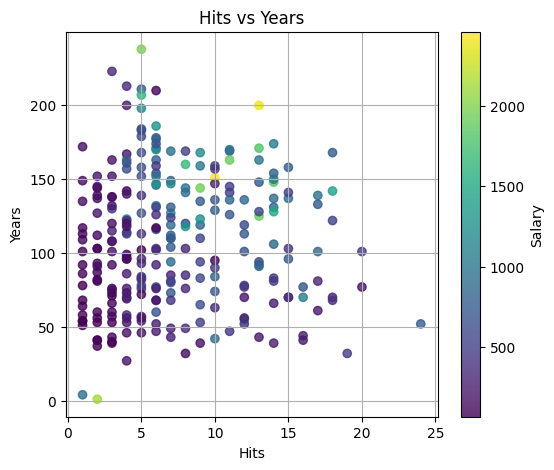

In [121]:
# Let's plot the scatter plot of hits and years using salary as the COLOR of the points.
# We will use the 'viridis' colormap and 'subplots' to create the plot.
fig, ax = plt.subplots(figsize=(6, 5))
sc = ax.scatter(years, hits, c=salary, cmap='viridis', alpha=0.8)
ax.set_xlabel('Hits')
ax.set_ylabel('Years')
ax.set_title('Hits vs Years')
# Let's add a colorbar to the plot
fig.colorbar(sc, label='Salary')
ax.grid(True);

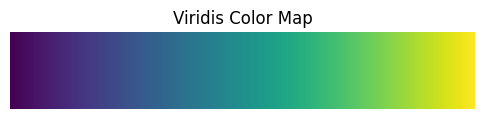

In [122]:
# Create a gradient image
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient image using the 'viridis' colormap
fig, ax = plt.subplots(figsize=(6, 1))
ax.imshow(gradient, aspect='auto', cmap='viridis')
ax.set_axis_off()
plt.title('Viridis Color Map')
plt.show()